In [132]:
using Plots
using Optim
using DelimitedFiles
include("../src/TreeLevelBispectrum.jl")
include("../src/power_spectrum.jl")
include("../src/bispectrum_multipoles.jl")

B00_itp (generic function with 1 method)

In [133]:
pkfunc = init_linear_pk("../data/test_pk.txt");

In [134]:
tree_level_b00(0.1, 0.1, 0.1, 2, 1, 0.5, pkfunc)

1.4063103361230693e9

In [111]:
kkk = kkk_grid(0.005, 0.01, 30);

In [155]:
b00 = zeros(2600)
b00integrated = zeros(2600)
for i in 1:2600
    k3, k2, k1 = kkk[i,:]
    #println(k1, " ", k2, " ", k3, " ", i)
    b00[i] = tree_level_b00(k1, k2, k3, 2, 1, 0.5, pkfunc)
    b00integrated[i] = B00(k1, k2, k3, 2, 1, 0.5, pkfunc, tree_level_bk)
end

In [136]:
pkconst = interpolate(([0, 1, 2, 3],), [1, 1, 1, 1], Gridded(Linear()))

4-element interpolate((::Vector{Int64},), ::Vector{Int64}, Gridded(Linear())) with element type Float64:
 Ratios.SimpleRatio{Int64}(1, 1)
 Ratios.SimpleRatio{Int64}(1, 1)
 Ratios.SimpleRatio{Int64}(1, 1)
 Ratios.SimpleRatio{Int64}(1, 1)

In [128]:
function allB00(b1, b2, f, pk)
    b00 = zeros(2600)
    for i in 1:2600
        k3, k2, k1 = kkk[i,:]
        b00[i] = tree_level_b00(k1, k2, k3, b1, b2, f, pk)
    end
    return b00
end


allB00 (generic function with 2 methods)

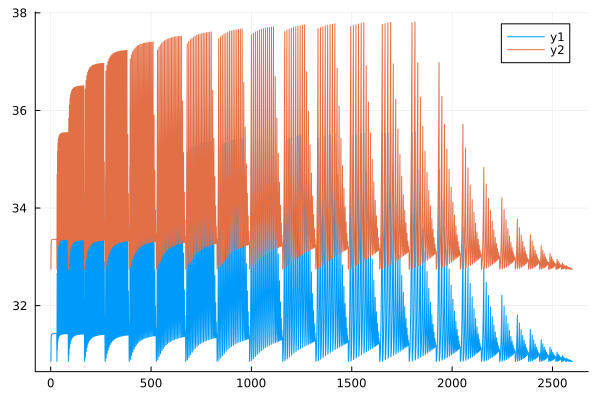

In [138]:

plot(allB00(2, 0, 0, pkconst))
plot!(allB00(2, 0, 0.1, pkconst))


In [151]:
k1 = kkk[:,1];
k2 = kkk[:,2];
k3 = kkk[:,3];
μ12 = (k3.^2 .- k1.^2 .- k2.^2)./2 ./k1./k2;
μ23 = (k1.^2 .- k3.^2 .- k2.^2)./2 ./k3./k2;
μ31 = (k2.^2 .- k3.^2 .- k1.^2)./2 ./k3./k1;

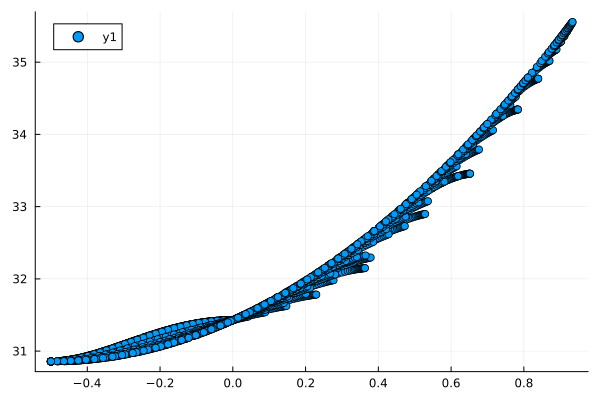

In [154]:
scatter((μ12), allB00(2, 0, 0, pkconst))

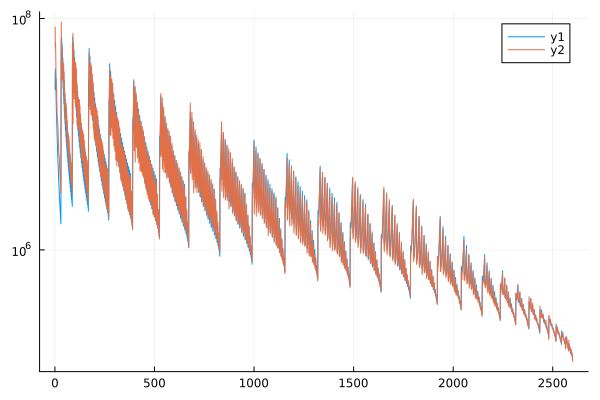

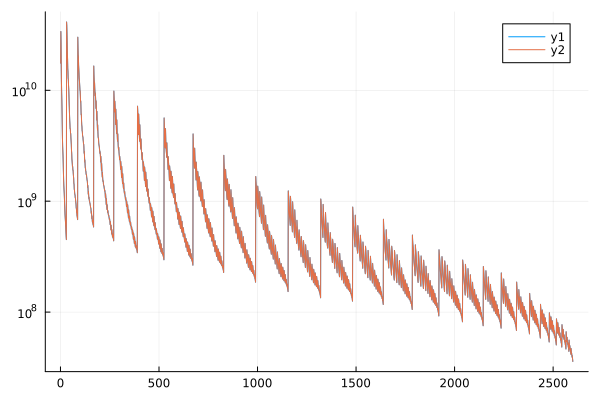

In [34]:
plot(b00, yaxis=:log)
plot!(b00integrated)

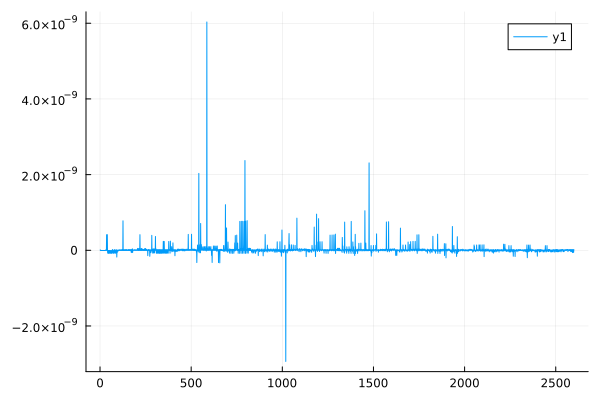

In [35]:
plot((b00 .- b00integrated)./b00integrated)

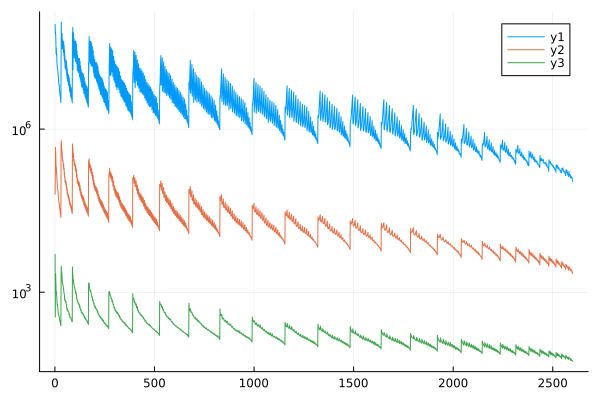

In [137]:
elg = readdlm("../data/bispectra_ELGz1.txt", comments=true)
lrg = readdlm("../data/bispectra_LRGz0.txt", comments=true)
qso = readdlm("../data/bispectra_QSOz2.txt", comments=true)
elgpk = readdlm("../data/powerspectra_ELGz1.txt", comments=true)
lrgpk = readdlm("../data/powerspectra_LRGz0.txt", comments=true)
qsopk = readdlm("../data/powerspectra_QSOz2.txt", comments=true)
kkk = elg[:,1:3]
bk_elg = elg[:,4]
bk_lrg = lrg[:,4]
bk_qso = qso[:,4]
pk_elg = elgpk[:,2]
pk_lrg = lrgpk[:,2]
pk_qso = qsopk[:,2]
plot(abs.(bk_elg), yaxis=:log)
plot!(abs.(bk_lrg))
plot!(abs.(bk_qso))


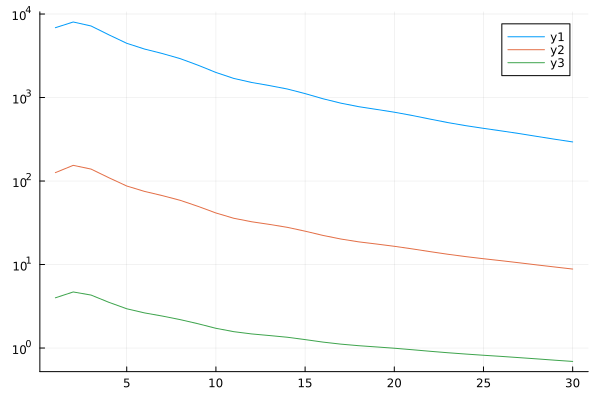

In [9]:
plot(abs.(pk_elg), yaxis=:log)
plot!(abs.(pk_lrg))
plot!(abs.(pk_qso))


In [10]:
bth = zeros(2600)
function chi2_elg(x) 
    b1, b2, f, S1 = x
    for i in 1:2600
        k1, k2, k3 = kkk[:,i]
        bth[i] = tree_level_b00(k1, k2, k3, b1, b2, f, pkfunc) + S1
    end
    return sum((bk_elg .- x).^2)
end

chi2_elg (generic function with 1 method)

In [17]:
pk = interpolate(([0, 1, 2, 3],), [1, 1, 1, 1], Gridded(Linear()))
tree_level_b00(1, 1, 1, 1, 1, 0, pk)
B00(1, 1, 1, 1, 1, 0, pk, tree_level_bk)

5.357142857142857

In [18]:
tree_level_b00(1, 1, 1, 0, 0, 1, pk)


0.004761904761904766

In [19]:
B00(1, 1, 1, 0, 0, 1, pk, tree_level_bk)

0.041156462584837274